# Kasava TSP Data Quality Assessment (SS, Oct 2021)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import datetime
import getpass
import psycopg2
import os
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
# from tqdm import tqdm
import seaborn as sns

# 1. Kasava

In [2]:
# Define variables
data_path = '/Users/sven.sabas/projects/tsp-evaluation-framework/data/source/kasava/ZegoSolution/'
data_files = [os.path.join(dirpath,filename) for dirpath, _, filenames in os.walk(data_path) for filename in filenames if filename.endswith('.csv')]

In [3]:
# Pull the data
data_df = pd.concat([pd.read_csv(file) for file in data_files], ignore_index = True)
data_df

,DateTime,LocDateTime,Lat,Lng,Speed,Head,Alt,Acu,Xmax,Ymax,Zmax,EventCode
0,2021-10-05-07-51-55-83,2021-10-05-07-51-55-00,5127.6839,-10.8501,0.79,102.7,25.4,7.8,90,76,115,0
1,2021-10-05-07-51-56-83,2021-10-05-07-51-55-00,5127.6839,-10.8501,0.79,102.7,25.4,7.8,59,-129,-44,0
2,2021-10-05-07-51-57-83,2021-10-05-07-51-57-00,5127.6847,-10.8487,1.80,43.0,24.2,7.1,75,161,56,0
3,2021-10-05-07-51-58-83,2021-10-05-07-51-58-00,5127.6849,-10.8477,0.00,43.0,23.1,6.5,59,74,-23,0
4,2021-10-05-07-51-59-84,2021-10-05-07-51-59-00,5127.6835,-10.8505,0.43,43.0,26.3,5.4,59,74,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8583071,2021-10-11-22-54-14-14,2021-10-11-22-54-14-00,5123.7305,-6.9063,0.00,353.1,41.5,3.0,44,35,-8,0
8583072,2021-10-11-22-54-15-14,2021-10-11-22-54-15-00,5123.7305,-6.9063,0.00,353.1,41.5,2.8,44,33,-18,0
8583073,2021-10-11-22-54-16-14,2021-10-11-22-54-16-00,5123.7305,-6.9063,0.00,353.1,41.5,2.8,44,40,-18,0
8583074,2021-10-11-22-54-17-14,2021-10-11-22-54-17-00,5123.7305,-6.9063,0.00,353.1,41.5,2.9,59,40,11,0


In [4]:
# Adjust the timestamps
data_df['DateTime'] = pd.to_datetime(data_df['DateTime'], utc=False, format="%Y-%m-%d-%H-%M-%S-%f")#, format="%Y-%m-%d-%H-%M-%S-%SS", errors='coerce')
data_df['LocDateTime'] = pd.to_datetime(data_df['LocDateTime'], utc=False, format="%Y-%m-%d-%H-%M-%S-%f")

In [5]:
# Daterange
print(f'Min date {data_df.DateTime.min()}, \
      \nMax date {data_df.DateTime.max()}, \
      \nDate range {data_df.DateTime.max() - data_df.DateTime.min()}')

Min date 2021-09-29 00:04:40.070000,       
Max date 2021-10-12 23:58:04.410000,       
Date range 13 days 23:53:24.340000


In [6]:
# Vehicles
len([x[0] for x in os.walk(data_path)])-1

29

Text(0.5, 0, 'Time Interval (Seconds)')

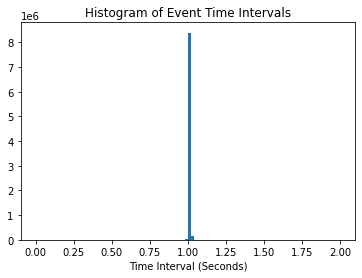

In [7]:
#  Histogram of data captture frequencies
plt.hist(
    data_df.DateTime.diff() / np.timedelta64(1, 's'),
    range=[0, 2], 
    bins=100
)
plt.title('Histogram of Event Time Intervals')
plt.xlabel('Time Interval (Seconds)')

In [8]:
# Event frequencies
data_df['EventCode'].value_counts()

0    8481719
2      66907
4      15762
1      11060
3       7628
Name: EventCode, dtype: int64

Text(0.5, 0, 'Time Interval (Seconds)')

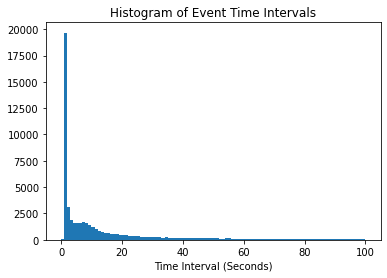

In [9]:
#  Histogram of event frequencies
plt.hist(
    data_df[data_df.EventCode == 2].DateTime.diff() / np.timedelta64(1, 's'),
    range=[0, 100], 
    bins=100
)
plt.title('Histogram of Event Time Intervals')
plt.xlabel('Time Interval (Seconds)')

Text(0.5, 0, 'Time Interval (Seconds)')

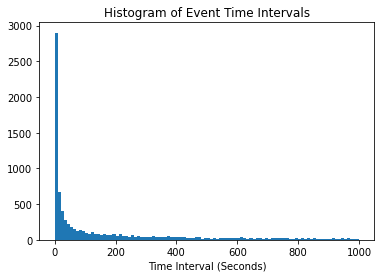

In [14]:
#  Histogram of event frequencies
plt.hist(
    data_df[data_df.EventCode == 1].DateTime.diff() / np.timedelta64(1, 's'),
    range=[0, 1000], 
    bins=100
)
plt.title('Histogram of Event Time Intervals')
plt.xlabel('Time Interval (Seconds)')

Text(0.5, 0, 'Time Interval (Seconds)')

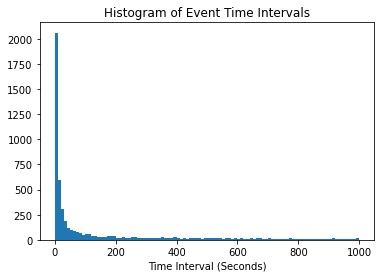

In [15]:
#  Histogram of event frequencies
plt.hist(
    data_df[data_df.EventCode == 3].DateTime.diff() / np.timedelta64(1, 's'),
    range=[0, 1000], 
    bins=100
)
plt.title('Histogram of Event Time Intervals')
plt.xlabel('Time Interval (Seconds)')

Text(0.5, 0, 'Time Interval (Seconds)')

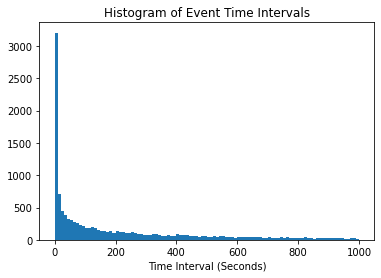

In [16]:
#  Histogram of event frequencies
plt.hist(
    data_df[data_df.EventCode == 4].DateTime.diff() / np.timedelta64(1, 's'),
    range=[0, 1000], 
    bins=100
)
plt.title('Histogram of Event Time Intervals')
plt.xlabel('Time Interval (Seconds)')

Text(0.5, 0, 'Speed (KMH)')

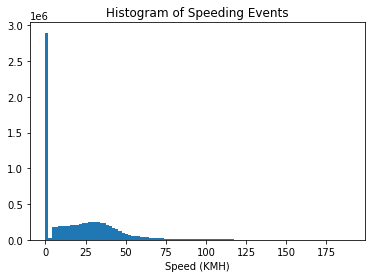

In [19]:
#  Histogram of event frequencies
plt.hist(
    data_df.Speed,
    # range=[0, 1000], 
    bins=100
)
plt.title('Histogram of Speeding Events')
plt.xlabel('Speed (KMH)')

Text(0.5, 0, 'Force (mG)')

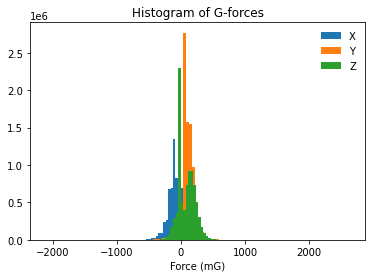

In [24]:
#  Histogram of event frequencies
plt.hist(
    data_df.Xmax,
    # range=[0, 1000], 
    bins=100,
    label='X'
)
plt.hist(
    data_df.Ymax,
    # range=[0, 1000], 
    bins=100,
    label='Y'
)
plt.hist(
    data_df.Zmax,
    # range=[0, 1000], 
    bins=100,
    label='Z'

)
plt.legend(loc='upper right', frameon=False)›
plt.title('Histogram of G-forces')
plt.xlabel('Force (mG)')